In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
from PIL import Image
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", Image.DecompressionBombWarning)

# Paths to the Soda Drinks directories
fake_dir = '/kaggle/input/ai-generated-images-vs-real-images/train/fake'
real_dir = '/kaggle/input/ai-generated-images-vs-real-images/train/real'


# Initialize variables to store information
file_extensions = {'fake': [], 'real': []}
image_shapes = {'fake': [], 'real': [] }
image_sizes = {'fake': [], 'real': []}

# Function to explore images in a directory
def explore_images(directory, label):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                # Get file extension
                ext = filename.split('.')[-1].lower()
                file_extensions[label].append(ext)

                # Get image shape
                shape = img.size  # (width, height)
                image_shapes[label].append(shape)

                # Get image size in bytes
                size = os.path.getsize(file_path)
                image_sizes[label].append(size)
        except Exception as e:
            print(f"Could not process file {file_path}: {e}")

# Explore Fake images
explore_images(fake_dir, 'fake')

# Explore Real images
explore_images(real_dir, 'real')


# Display the results
print(f"fake Image Extensions: {set(file_extensions['fake'])}")
print(f"real Image Extensions: {set(file_extensions['real'])}")

print(f"fake Image Shapes: {set(image_shapes['fake'])}")
print(f"real Image Shapes: {set(image_shapes['real'])}")


print(f"fake Image Sizes (min, max): {min(image_sizes['fake'])} bytes, {max(image_sizes['fake'])} bytes")
print(f"real Image Sizes (min, max): {min(image_sizes['real'])} bytes, {max(image_sizes['real'])} bytes")


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (99991727 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (96000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (107184040 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DO

fake Image Extensions: {'jpg', 'png'}
real Image Extensions: {'jpg'}
fake Image Shapes: {(2251, 2813), (798, 803), (1200, 1600), (1072, 1680), (1908, 2181), (1338, 896), (1524, 1172), (2880, 5760), (1080, 1540), (1626, 810), (365, 511), (576, 960), (900, 1200), (2000, 993), (2912, 1632), (1536, 1532), (2079, 993), (832, 512), (1264, 960), (982, 982), (1828, 773), (4142, 1916), (1296, 912), (672, 1808), (2072, 2939), (863, 1030), (1024, 718), (4000, 3000), (4335, 2990), (864, 1376), (1015, 1020), (896, 1328), (1334, 2048), (1154, 1443), (1024, 1104), (1280, 1704), (1664, 2304), (3072, 4608), (1536, 2304), (874, 607), (5376, 1536), (1061, 470), (2528, 1920), (1480, 1850), (1648, 760), (896, 896), (1104, 696), (889, 893), (1024, 672), (1232, 1232), (3296, 1440), (1880, 2350), (2912, 1514), (412, 675), (1170, 1665), (3904, 1216), (2500, 1426), (688, 1024), (933, 1200), (3840, 3037), (1456, 832), (1328, 912), (960, 1568), (1360, 864), (1481, 1190), (1920, 2400), (1920, 1088), (1640, 2122), 

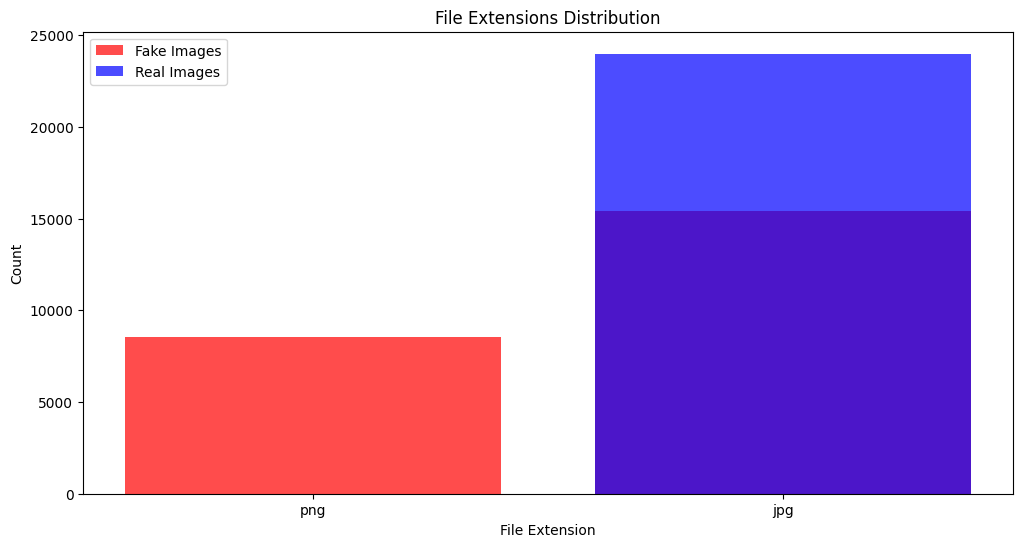

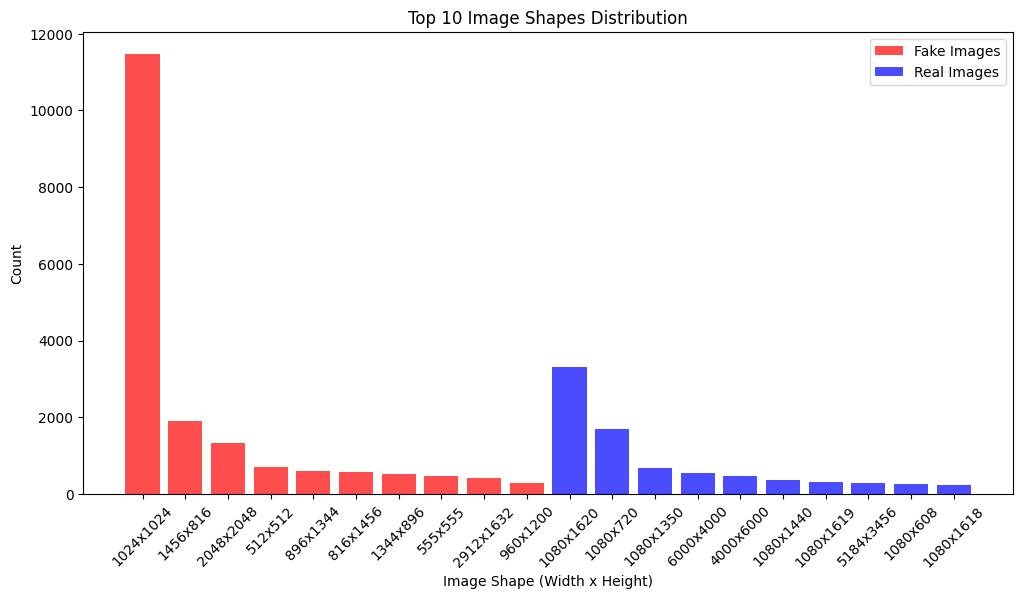

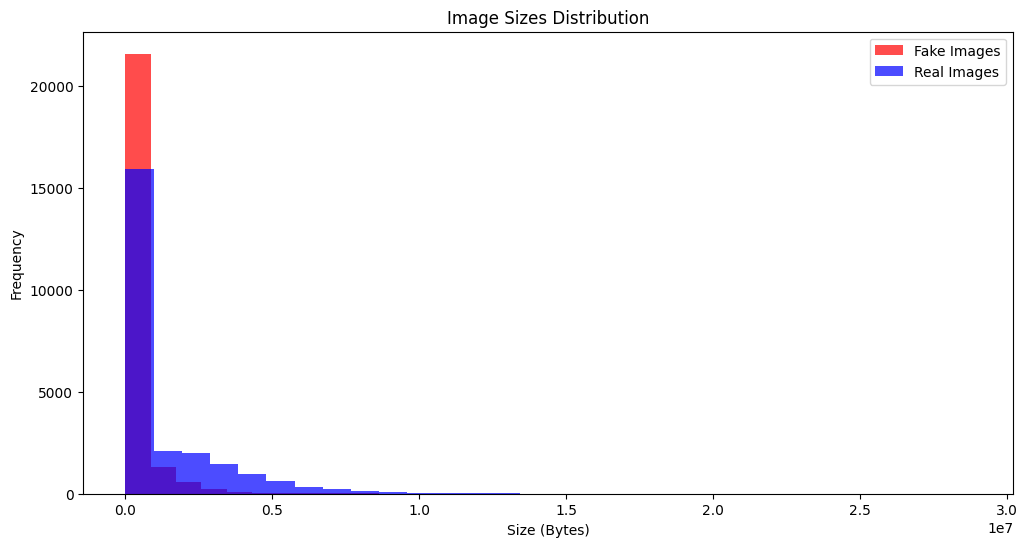

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Plot File Extensions
def plot_file_extensions():
    fake_counts = Counter(file_extensions['fake'])
    real_counts = Counter(file_extensions['real'])

    plt.figure(figsize=(12, 6))

    plt.bar(fake_counts.keys(), fake_counts.values(), color='red', alpha=0.7, label='Fake Images')
    plt.bar(real_counts.keys(), real_counts.values(), color='blue', alpha=0.7, label='Real Images')

    plt.title('File Extensions Distribution')
    plt.xlabel('File Extension')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Plot Image Shapes
def plot_image_shapes():
    fake_shapes = Counter(image_shapes['fake'])
    real_shapes = Counter(image_shapes['real'])

    # Sort and limit to top 10 shapes
    fake_shapes = dict(sorted(fake_shapes.items(), key=lambda x: x[1], reverse=True))
    real_shapes = dict(sorted(real_shapes.items(), key=lambda x: x[1], reverse=True))

    # Convert tuples to strings for plotting
    fake_keys = [f"{k[0]}x{k[1]}" for k in list(fake_shapes.keys())[:10]]
    real_keys = [f"{k[0]}x{k[1]}" for k in list(real_shapes.keys())[:10]]

    fake_values = list(fake_shapes.values())[:10]
    real_values = list(real_shapes.values())[:10]

    plt.figure(figsize=(12, 6))

    plt.bar(fake_keys, fake_values, color='red', alpha=0.7, label='Fake Images')
    plt.bar(real_keys, real_values, color='blue', alpha=0.7, label='Real Images')

    plt.title('Top 10 Image Shapes Distribution')
    plt.xlabel('Image Shape (Width x Height)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot Image Sizes
def plot_image_sizes():
    plt.figure(figsize=(12, 6))

    plt.hist(image_sizes['fake'], bins=30, color='red', alpha=0.7, label='Fake Images')
    plt.hist(image_sizes['real'], bins=30, color='blue', alpha=0.7, label='Real Images')

    plt.title('Image Sizes Distribution')
    plt.xlabel('Size (Bytes)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the functions to plot graphs
plot_file_extensions()
plot_image_shapes()
plot_image_sizes()

In [4]:
# Count the number of images in each class
num_fake_images = len(os.listdir(fake_dir))
num_real_images = len(os.listdir(real_dir))

num_fake_images, num_real_images

(24000, 24000)

In [5]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import os
from PIL import Image, ImageFile
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", Image.DecompressionBombWarning)



# Define dataset path
data_dir = '/kaggle/input/ai-generated-images-vs-real-images/train'


# Set a higher limit if you know your dataset has large images
Image.MAX_IMAGE_PIXELS = None  # Disable the check completely (use with caution)
# or
Image.MAX_IMAGE_PIXELS = 200000000  # Set to a specific safe value (e.g., 200M pixels)


def convert_to_rgb(image):
    """
    Ensures the input image is in RGB mode. Converts images with a palette
    (e.g., PNG or GIF) and transparency to RGBA, then to RGB by blending with a white background.
    """
    if image.mode == 'P':  # Palette-based images
        image = image.convert("RGBA")  # Convert to RGBA
    if image.mode == "RGBA":  # Images with transparency
        # Blend with a white background to remove transparency
        background = Image.new("RGB", image.size, (255, 255, 255))
        image = Image.alpha_composite(background, image).convert("RGB")
    elif image.mode != "RGB":
        image = image.convert("RGB")  # Convert other modes directly to RGB
    return image



def resize_large_image(image, max_size):
    """
    Resize images that exceed a certain size.
    Args:
        image (PIL.Image.Image): Input image.
        max_size (tuple): Maximum allowed dimensions (width, height).
    Returns:
        PIL.Image.Image: Resized image if necessary.
    """
    if image.size[0] > max_size[0] or image.size[1] > max_size[1]:
        image.thumbnail(max_size, Image.Resampling.LANCZOS)  # Use LANCZOS for high-quality downscaling
    return image


train_transform = transforms.Compose([
    transforms.Lambda(lambda img: resize_large_image(img, max_size=(5000, 5000))),  # Ensure large images are resized
    transforms.Lambda(convert_to_rgb),               # Convert to RGB
    transforms.RandomResizedCrop(224),               # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(p=0.5),          # Randomly flip horizontally with 50% probability
    transforms.RandomVerticalFlip(p=0.2),            # Randomly flip vertically with 20% probability
    transforms.RandomRotation(degrees=15),           # Random rotation within ±15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust color properties
    transforms.ToTensor(),                           # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])



val_transform = transforms.Compose([
    transforms.Lambda(convert_to_rgb),  # Convert to RGB
    transforms.Resize((224, 224)),      # Resize images to 224x224
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Minimum file size in bytes for an image to be considered valid
MIN_IMAGE_FILE_SIZE = 3284  # 1 KB (adjust as needed)

# Function to validate images based on size and format
def is_valid_image(file_path):
    """
    Checks if the image file is valid, has enough bytes, and can be opened.
    Args:
        file_path (str): Path to the image file.
    Returns:
        bool: True if valid, False otherwise.
    """
    try:
        # Check file size
        if os.path.getsize(file_path) < MIN_IMAGE_FILE_SIZE:
            return False
        
        # Verify image integrity
        with Image.open(file_path) as img:
            img.verify()  # Verify it's a valid image
        return True
    except (OSError, Image.DecompressionBombError):
        return False

# Custom ImageFolder class that filters invalid images
class ValidImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform=None):
        super().__init__(root, transform)
        # Filter out invalid images
        self.samples = [(path, label) for path, label in self.samples if is_valid_image(path)]
        self.targets = [label for _, label in self.samples]

# Load dataset and validate images
dataset = ValidImageFolder(root=data_dir, transform=train_transform)

In [6]:
from torch.utils.data import Subset
# Separate indices for "fake" and "real" images
fake_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == dataset.class_to_idx['fake']]
real_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == dataset.class_to_idx['real']]

# Take 50% from each class
fake_subset_size = int(0.5 * len(fake_indices))
real_subset_size = int(0.5 * len(real_indices))

fake_subset_indices = np.random.choice(fake_indices, fake_subset_size, replace=False)
real_subset_indices = np.random.choice(real_indices, real_subset_size, replace=False)

# Combine the indices for the balanced subset
balanced_subset_indices = np.concatenate((fake_subset_indices, real_subset_indices))

# Create the subset
balanced_subset = Subset(dataset, balanced_subset_indices)

# Print the sizes of the original and subset datasets
print(f"Original Dataset Size: {len(dataset)}")
print(f"Balanced Subset Size: {len(balanced_subset)} (Fake: {fake_subset_size}, Real: {real_subset_size})")


Original Dataset Size: 47998
Balanced Subset Size: 23999 (Fake: 12000, Real: 11999)


In [7]:
# Split the balanced subset into training and validation sets
train_size = int(0.8 * len(balanced_subset))
val_size = len(balanced_subset) - train_size
train_dataset, val_dataset = random_split(balanced_subset, [train_size, val_size])

# Apply validation transforms to validation set
val_dataset.dataset.transform = val_transform

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

In [8]:
# Print the sizes of the training and validation datasets
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")

Train Dataset Size: 19199
Validation Dataset Size: 4800


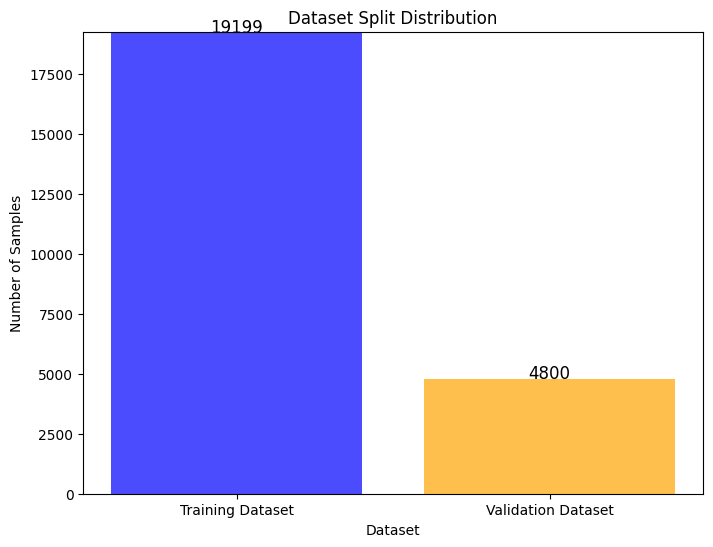

In [9]:
import matplotlib.pyplot as plt

# Calculate dataset sizes
train_size = len(train_dataset)
val_size = len(val_dataset)

# Dataset labels and sizes
labels = ['Training Dataset', 'Validation Dataset']
sizes = [train_size, val_size]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'orange'], alpha=0.7)

# Add annotations to the bars
for i, size in enumerate(sizes):
    plt.text(i, size + 5, str(size), ha='center', fontsize=12)

# Add chart details
plt.title('Dataset Split Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset')
plt.ylim(0, max(sizes) + 50)
plt.show()


In [10]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [11]:
from torchvision.models import resnet18
import torch.nn as nn

# Load a pre-trained ResNet18
model = models.resnet18(pretrained=True)

# Modify the last fully connected layer with dropout
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),  # 50% dropout
    nn.Linear(num_ftrs, 2)  # 2 output classes
)

model = model.to(device)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 183MB/s]


In [12]:
from torch.optim.lr_scheduler import StepLR

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Define a scheduler that reduces the learning rate every 3 epochs
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)


In [13]:
# Early stopping parameters
patience = 3
trigger_times = 0
best_val_loss = float('inf')


In [14]:
# Training and validation loop
epochs = 10
best_val_acc = 0.0

# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

In [15]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training phase
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())
    
    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

            # Store predictions and labels for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_dataset)
    val_acc = val_corrects.double() / len(val_dataset)

    val_losses.append(val_loss)
    val_accuracies.append(val_acc.item())

    print(f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    # Precision, Recall, F1-Score
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=dataset.classes))

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), f'best_model.pth{epoch}')
        trigger_times = 0  # Reset early stopping counter
    else:
        trigger_times += 1
        print(f"Early stopping trigger count: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("Early stopping...")
            break

    # Step the scheduler
    scheduler.step()

print(f'Best Validation Accuracy: {best_val_acc:.4f}')


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5304 Acc: 0.7654
Val Loss: 0.5380 Acc: 0.7733

Classification Report:
              precision    recall  f1-score   support

        fake       0.84      0.68      0.75      2392
        real       0.73      0.87      0.79      2408

    accuracy                           0.77      4800
   macro avg       0.78      0.77      0.77      4800
weighted avg       0.78      0.77      0.77      4800

Epoch 2/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.4041 Acc: 0.8215
Val Loss: 0.4537 Acc: 0.7890

Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.64      0.75      2392
        real       0.72      0.94      0.82      2408

    accuracy                           0.79      4800
   macro avg       0.82      0.79      0.78      4800
weighted avg       0.82      0.79      0.78      4800

Epoch 3/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3681 Acc: 0.8388
Val Loss: 1.0794 Acc: 0.5913

Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.19      0.31      2392
        real       0.55      0.99      0.71      2408

    accuracy                           0.59      4800
   macro avg       0.76      0.59      0.51      4800
weighted avg       0.76      0.59      0.51      4800

Early stopping trigger count: 1/3
Epoch 4/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3234 Acc: 0.8589
Val Loss: 0.3286 Acc: 0.8585

Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.82      0.85      2392
        real       0.83      0.90      0.86      2408

    accuracy                           0.86      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.86      0.86      0.86      4800

Epoch 5/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2997 Acc: 0.8718
Val Loss: 0.3087 Acc: 0.8688

Classification Report:
              precision    recall  f1-score   support

        fake       0.90      0.83      0.86      2392
        real       0.84      0.91      0.87      2408

    accuracy                           0.87      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.87      0.87      0.87      4800

Epoch 6/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2870 Acc: 0.8780
Val Loss: 0.3061 Acc: 0.8685

Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.82      0.86      2392
        real       0.84      0.92      0.88      2408

    accuracy                           0.87      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.87      0.87      0.87      4800

Epoch 7/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2786 Acc: 0.8814
Val Loss: 0.2908 Acc: 0.8763

Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.87      0.87      2392
        real       0.87      0.89      0.88      2408

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Epoch 8/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2729 Acc: 0.8847
Val Loss: 0.2956 Acc: 0.8702

Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.86      0.87      2392
        real       0.87      0.88      0.87      2408

    accuracy                           0.87      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.87      0.87      0.87      4800

Early stopping trigger count: 1/3
Epoch 9/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2754 Acc: 0.8838
Val Loss: 0.2879 Acc: 0.8813

Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.87      0.88      2392
        real       0.88      0.89      0.88      2408

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Epoch 10/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2738 Acc: 0.8850
Val Loss: 0.2817 Acc: 0.8817

Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.87      0.88      2392
        real       0.87      0.89      0.88      2408

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Best Validation Accuracy: 0.0000


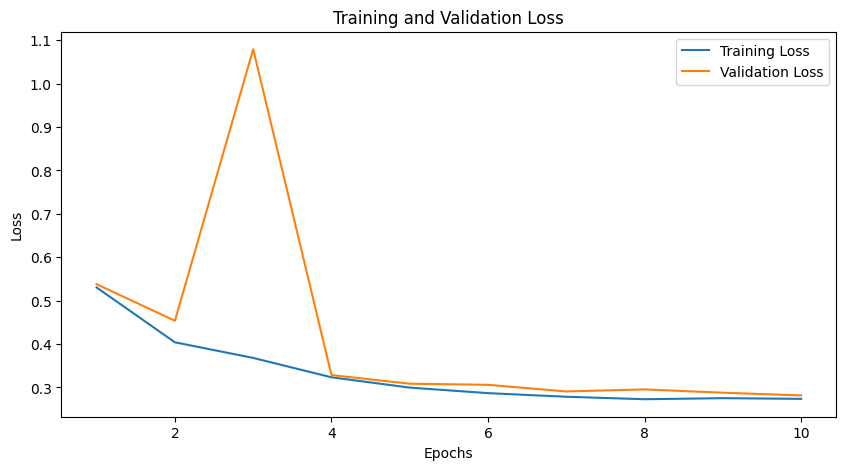

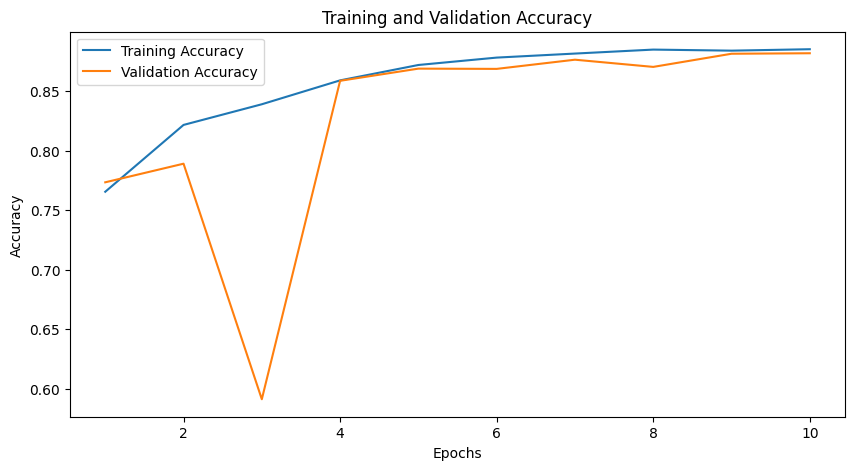

In [16]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
